<a href="https://colab.research.google.com/github/sutharimanikanta/-technity-tasks-/blob/main/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# specially for indina nlp
!pip install indic-nlp-library


ERROR: Operation cancelled by user


In [ ]:
import indicnlp


Original sequences:
[[1, 2, 3, 4, 5], [1, 2, 3], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

Padded sequences:

[[1 2 3 4 5]

 [1 2 3 0 0]

 [1 2 3 4 5]]


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

In [ ]:
import pandas as pd

# Read the text file into a list of lines
with open('/content/english_telugu_data.txt', 'r', encoding='utf-8') as file:
     lines = file.readlines()

# Extract English and Telugu sentences from each line
english_sentences = []
telugu_sentences = []
for line in lines:
    if '++++$++++' in line:
        english, telugu = line.strip().split('++++$++++')
        english_sentences.append(english.strip())
        telugu_sentences.append(telugu.strip())

# Create a DataFrame with English and Telugu sentences
data = pd.DataFrame({'English': english_sentences, 'Telugu': telugu_sentences})

# Split the data into training, validation, and testing sets (e.g., 70% train, 15% validation, 15% test)
train_data, valid_data, test_data = np.split(data.sample(frac=1, random_state=42), [int(.7*len(data)), int(.85*len(data))])

# Extract text and labels for each set
x_train, y_train = train_data['English'].values, train_data['Telugu'].values
x_valid, y_valid = valid_data['English'].values, valid_data['Telugu'].values
x_test, y_test = test_data['English'].values, test_data['Telugu'].values


In [ ]:
data

,English,Telugu
0,His legs are long.,అతని కాళ్ళు పొడవుగా ఉన్నాయి.
1,Who taught Tom how to speak French?,టామ్ ఫ్రెంచ్ మాట్లాడటం ఎలా నేర్పించారు?
2,I swim in the sea every day.,నేను ప్రతి రోజు సముద్రంలో ఈత కొడతాను.
3,Tom popped into the supermarket on his way hom...,టామ్ కొంచెం పాలు కొనడానికి ఇంటికి వెళ్ళేటప్పుడ...
4,Smoke filled the room.,పొగ గదిని నింపింది.
...,...,...
155793,I didn't do it deliberately.,నేను ఉద్దేశపూర్వకంగా చేయలేదు.
155794,That book isn't interesting.,ఆ పుస్తకం ఆసక్తికరంగా లేదు.
155795,Tom has never seen the Atlantic Ocean.,టామ్ అట్లాంటిక్ మహాసముద్రం చూడలేదు.
155796,Tom didn't even discuss the problem with Mary.,టామ్ మేరీతో సమస్య గురించి కూడా చర్చించలేదు.


In [ ]:
x_train


array(['Tom opened his locker.', 'Tom asked if I had found his wallet.',
       'I know Tom and Mary were more than just friends.', ...,
       "I've known Tom since he was three years old.",
       'Both of my sisters are married.',
       'When did she leave the classroom?'], dtype=object)

# Idea for sentimental analysis
* for indian langauge without labels
* unsupervised nlp
* zero short nlp


In [ ]:
train_data

,English,Telugu
108129,Tom opened his locker.,టామ్ తన లాకర్ తెరిచాడు.
20423,Tom asked if I had found his wallet.,నేను అతని వాలెట్ దొరికిందా అని టామ్ అడిగాడు.
17796,I know Tom and Mary were more than just friends.,టామ్ మరియు మేరీ కేవలం స్నేహితుల కంటే ఎక్కువగా ...
67316,I told Tom to stay indoors.,నేను టామ్‌ను ఇంట్లో ఉండమని చెప్పాను.
8437,They didn't see me.,వారు నన్ను చూడలేదు.
...,...,...
67970,Tom was whistling a song his mother had taught...,టామ్ తన తల్లి అతనికి నేర్పించిన పాటను ఈల వేస్త...
35239,She advised him to go to the police station.,ఆమె అతన్ని పోలీస్‌స్టేషన్‌కు వెళ్లమని సలహా ఇచ్...
22368,I've known Tom since he was three years old.,టామ్‌కు మూడేళ్ల వయస్సు నుండే నాకు తెలుసు.
40764,Both of my sisters are married.,నా సోదరీమణులు ఇద్దరూ వివాహం చేసుకున్నారు.


In [ ]:
data.columns

Index(['English', 'Telugu'], dtype='object')

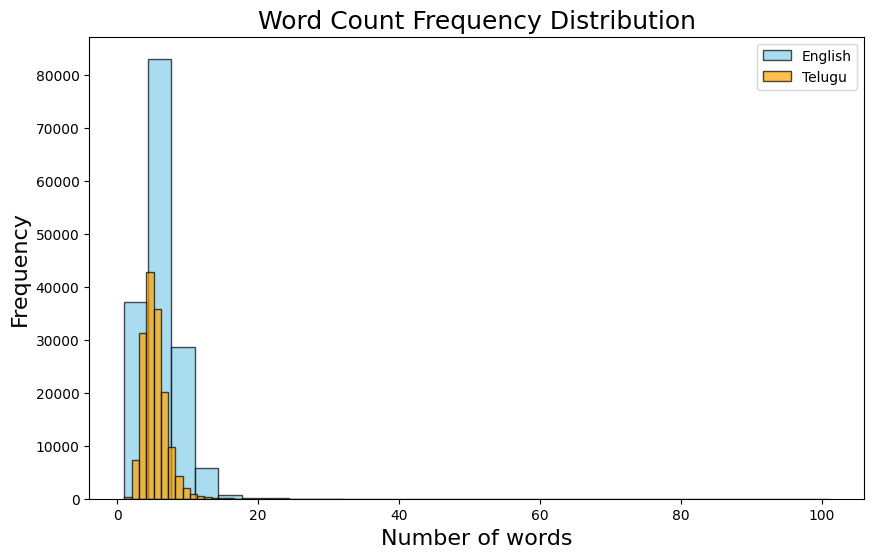

In [ ]:
import matplotlib.pyplot as plt

from indicnlp.tokenize import indic_tokenize
# Tokenize English and Telugu texts and calculate word counts
english_word_counts = data['English'].apply(lambda x: len(list(x.split())))
telugu_word_counts = data['Telugu'].apply(lambda x: len(list(indic_tokenize.trivial_tokenize(x))))

# Plot the frequency histograms
plt.figure(figsize=(10, 6))

# English word count histogram
plt.hist(english_word_counts, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='English')
# Telugu word count histogram
plt.hist(telugu_word_counts, bins=30, color='orange', edgecolor='black', alpha=0.7, label='Telugu')

plt.xlabel('Number of words', fontsize=16, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=16, fontname='Times New Roman')
plt.title('Word Count Frequency Distribution', fontsize=18, fontname='Times New Roman')
plt.legend()
plt.show()


# tokenization and building vocabulary

In [ ]:
!mkdir data

In [ ]:
english_vocab = set()
telugu_vocab = set()
# Tokenize English texts and build vocabulary
for english_text in data['English']:
    english_tokens = english_text.split()  # Assuming English words are separated by space
    for token in english_tokens:
        if token.strip():
            english_vocab.add(token.strip())

# Tokenize Telugu texts and build vocabulary
for telugu_text in data['Telugu']:
    telugu_tokens = indic_tokenize.trivial_tokenize(telugu_text)
    for token in telugu_tokens:
        if token.strip():
            telugu_vocab.add(token.strip())

# Write the English vocabulary to a file
with open('data/english_vocab.txt', 'w', encoding='utf-8') as file:
    for word in english_vocab:
        file.write(word + '\n')

# Write the Telugu vocabulary to a file
with open('data/telugu_vocab.txt', 'w', encoding='utf-8') as file:
    for word in telugu_vocab:
        file.write(word + '\n')

print("Length of English vocabulary:", len(english_vocab))
print("Length of Telugu vocabulary:", len(telugu_vocab))

Length of English vocabulary: 26703
Length of Telugu vocabulary: 38975


In [ ]:
list(english_vocab)[:10]

['half-finished.',
 'calling?',
 'writes',
 'started,',
 'grades',
 'posture.',
 'foreigner.',
 'burgers,',
 'waters',
 'governed']

In [ ]:
list(telugu_vocab)[:10]

['మేమిద్దరం',
 'నడిచాము',
 'ఎక్స్ఛేంజ్',
 'సరైనదని',
 'పాదచారులు',
 'పుట్టుకతోనే',
 'చోటుకి',
 'హత్యాయత్నానికి',
 'మూసివేస్తారా',
 'చేతితో']

* embedding_dim is between 100 and 300. Larger values, such as 300, are often used for more complex tasks or larger datasets.
* maximum number of words or tokens allowed in each input sequence.

In [ ]:
class Config():
    embedding_dim = 200
    max_seq_len = 200

config = Config()

In [ ]:
class Preprocessor():
    def __init__(self, config, data):
        self.config = config
        self.data = data
        # Initialize token-to-index mapping dictionaries for English and Telugu
        self.english_token2idx = self.build_vocab(data['English'])
        self.telugu_token2idx = self.build_vocab(data['Telugu'])

    def build_vocab(self, text_list):
        # Initialize token-to-index mapping dictionary, reserve 0 for padding characters and 1 for unknown words
        token2idx = {"[PAD]": 0, "[UNK]": 1}  # {word: id}
        # Enumerate over each text in the input text list
        for index, text in enumerate(text_list):
            # Split the text into tokens (words)
            tokens = text.split()
            # Add each token to the token-to-index mapping dictionary
            for token in tokens:
                if token not in token2idx:
                    token2idx[token] = len(token2idx)  # Assign an index to the token
        return token2idx

    def transform(self, text_list, language):
        # Choose the appropriate token-to-index mapping dictionary based on the language
        if language == 'English':
            token2idx = self.english_token2idx
        elif language == 'Telugu':
            token2idx = self.telugu_token2idx
        else:
            raise ValueError("Unsupported language. Choose either 'English' or 'Telugu'.")

        # Tokenize text and convert tokens to corresponding IDs
        idx_list = []
        for text in text_list:
            tokens = text.split()  # Split the text into tokens (words)
            idx_text = [token2idx.get(word, token2idx['[UNK]']) for word in tokens]  # Convert each token to its index
            idx_list.append(idx_text)

        # Pad sequences to the maximum sequence length
        idx_padding = pad_sequences(idx_list, maxlen=self.config.max_seq_len, padding='post', truncating='post')

        return idx_padding


In [ ]:
# Assuming the Preprocessor class has been defined as mentioned earlier
# Instantiate the Config class
config = Config()

# Instantiate the Preprocessor class with the Config object
preprocessor = Preprocessor(config, data)  # Assuming 'data' is your DataFrame containing English and Telugu sentences

# Transform the input texts into padded index sequences
res_show = preprocessor.transform(['టామ్ తన లాకర్ తెరిచాడు'], language='Telugu')
print(res_show.shape)  # Print the shape of the resulting array


(1, 200)


In [ ]:
res_show

array([[    6,   157, 10765, 33023,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [ ]:
class TextCNN(object):
    def __init__(self, config, data):
        self.config = config
        self.preprocessor = Preprocessor(config, data)
        self.class_names_english = None
        self.class_names_telugu = None

    # The rest of your class implementation...


    def build_model(self):
        idx_input = tf.keras.layers.Input((self.config.max_seq_len,))
        input_embedding = tf.keras.layers.Embedding(len(self.preprocessor.english_token2idx),
                                                     self.config.embedding_dim,
                                                     input_length=self.config.max_seq_len,
                                                     mask_zero=True)(idx_input)
        input_embedding_dropout = tf.keras.layers.Dropout(rate=0.4)(input_embedding)

        convs = []
        for kernel_size in [3, 4, 5]:
            c = tf.keras.layers.Conv1D(128, kernel_size, activation='relu')(input_embedding_dropout)
            c = tf.keras.layers.GlobalMaxPooling1D()(c)
            convs.append(c)
        fea_cnn = tf.keras.layers.Concatenate()(convs)
        fea_cnn_dropout = fea_cnn

        fea_dense = tf.keras.layers.Dense(128, activation='relu')(fea_cnn_dropout)
        ecoder_output = tf.keras.layers.Dense(self.config.embedding_dim * self.config.max_seq_len, activation='sigmoid')(fea_dense)
        decoder_output_reshaped = tf.keras.layers.Reshape((self.config.max_seq_len, self.config.embedding_dim))(decoder_output)

        # Define the autoencoder model
        model = tf.keras.Model(inputs=idx_input, outputs=decoder_output_reshaped)

        # Compile the autoencoder model
        model.compile(optimizer='adam', loss='binary_crossentropy')

        # output = tf.keras.layers.Dense(len(self.class_names_telugu), activation='softmax')(fea_dense)

        # model = tf.keras.Model(inputs=idx_input, outputs=output)
        # model.compile(loss='sparse_categorical_crossentropy',
        #               optimizer='adam',
        #               metrics=['accuracy'])

        model.summary()

        self.model = model

    def fit(self, x_train, y_train, x_valid=None, y_valid=None, epochs=5, batch_size=128, callbacks=None, **kwargs):
        self.build_model()

        x_train = self.preprocessor.transform(x_train, language='English')
        y_train = self.preprocessor.transform(y_train, language='Telugu')

        valid_data = None
        if x_valid is not None and y_valid is not None:
            x_valid = self.preprocessor.transform(x_valid, language='English')
            y_valid = self.preprocessor.transform(y_valid, language='Telugu')
            valid_data = (x_valid, y_valid)

        self.model.fit(
            x=x_train,
            y=y_train,
            validation_data=valid_data,
            batch_size=batch_size,
            epochs=epochs,
            callbacks=callbacks,
            **kwargs
        )

    def evaluate(self, x_test, y_test):
        x_test = self.preprocessor.transform(x_test)
        y_test = self.preprocessor.transform(y_test)

        y_pred_probs = self.model.predict(x_test)
        y_pred = np.argmax(y_pred_probs, axis=-1)

        result = classification_report(y_test, y_pred, target_names=self.class_names_telugu)
        print(result)

    def single_predict(self, text):
       input_idx = self.preprocessor.transform([text])
       predict_prob = self.model.predict(input_idx)[0]
       predicted_telugu_idx = np.argmax(predict_prob)
       predicted_telugu_sentence = self.class_names_telugu[predicted_telugu_idx]
       return predicted_telugu_sentence, predict_prob[predicted_telugu_idx]

    def load_model(self, ckpt_file):
        self.build_model()
        self.model.load_weights(ckpt_file)


In [ ]:
text_cnn = TextCNN(config, data)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping callback
patience = 6
early_stop = EarlyStopping(monitor='val_loss', patience=patience)

# Define checkpoint callback
checkpoint_prefix = './checkpoints/textcnn_imdb_ckpt'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True,
    save_best_only=True
)
# Initialize and train the model
model = TextCNN(config, data)
model.fit(x_train, y_train, x_valid, y_valid, epochs=10, batch_size=64, callbacks=[early_stop, checkpoint_callback])

# Evaluate the model
model.evaluate(x_test, y_test)

# Example of single prediction
english_sentence = "How are you?"
telugu_translation, _ = model.single_predict(english_sentence)
print(f"Telugu Translation: {telugu_translation}")



TypeError: object of type 'NoneType' has no len()

In [ ]:
class Config1():
    def __init__(self):
        self.embedding_dim = 200
        self.max_seq_len = 200
        self.latent_dim = 100  # Default value for latent dimension

config = Config1()


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report

class Model2(object):
    def __init__(self, config, data):
        self.config = config
        self.preprocessor = Preprocessor(config, data)

    def build_model(self):
        # Define encoder
        encoder_input = tf.keras.layers.Input(shape=(self.config.max_seq_len,))
        encoder_embedding = tf.keras.layers.Embedding(len(self.preprocessor.english_token2idx),
                                                       self.config.embedding_dim,
                                                       input_length=self.config.max_seq_len,
                                                       mask_zero=True)(encoder_input)
        _, state_h, state_c = tf.keras.layers.LSTM(self.config.latent_dim,
                                                    return_sequences=False,
                                                    return_state=True,
                                                    dropout=0.2)(encoder_embedding)
        encoder_states = [state_h, state_c]

        # Define decoder
        decoder_input = tf.keras.layers.Input(shape=(self.config.max_seq_len,))
        decoder_embedding = tf.keras.layers.Embedding(len(self.preprocessor.telugu_token2idx),
                                                       self.config.embedding_dim,
                                                       input_length=self.config.max_seq_len,
                                                       mask_zero=True)(decoder_input)
        decoder_lstm = tf.keras.layers.LSTM(self.config.latent_dim,
                                             return_sequences=True,
                                             return_state=True,
                                             dropout=0.2)
        decoder_output, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
        decoder_dense = tf.keras.layers.Dense(len(self.preprocessor.telugu_token2idx), activation='softmax')
        decoder_output = decoder_dense(decoder_output)

        # Define model
        model = tf.keras.Model([encoder_input, decoder_input], decoder_output)
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

        model.summary()

        self.model = model

    def fit(self, x_train, y_train, x_valid=None, y_valid=None, epochs=5, batch_size=128, callbacks=None, **kwargs):
        self.build_model()

        train_dataset = self._create_dataset(x_train, y_train, batch_size)

        valid_data = None
        if x_valid is not None and y_valid is not None:
            valid_dataset = self._create_dataset(x_valid, y_valid, batch_size)
            valid_data = valid_dataset.prefetch(tf.data.experimental.AUTOTUNE)

        # Define callbacks
        callbacks = self._get_callbacks()

        # Fit model
        self.model.fit(
            train_dataset,
            validation_data=valid_data,
            epochs=epochs,
            callbacks=callbacks,
            **kwargs
        )

    def _create_dataset(self, x, y, batch_size):
        x_enc = self.preprocessor.transform(x, language='English')
        y_dec = self.preprocessor.transform(y, language='Telugu')
        x_dec = np.zeros((len(y_dec), self.config.max_seq_len))  # Initialize decoder input data for training
        dataset = tf.data.Dataset.from_tensor_slices(({'input_1': x_enc, 'input_2': x_dec}, y_dec))
        dataset = dataset.shuffle(len(x)).batch(batch_size)
        dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
        return dataset

    def _get_callbacks(self):
        # Define early stopping callback
        patience = 6
        early_stop = EarlyStopping(monitor='val_loss', patience=patience)

        # Define checkpoint callback
        checkpoint_prefix = './checkpoints/textcnn_imdb_ckpt'
        checkpoint_callback = ModelCheckpoint(
            filepath=checkpoint_prefix,
            save_weights_only=True,
            save_best_only=True
        )

        return [early_stop, checkpoint_callback]

    def evaluate(self, x_test, y_test):
        test_dataset = self._create_dataset(x_test, y_test, batch_size=128)
        y_pred_probs = self.model.predict(test_dataset)
        y_pred = np.argmax(y_pred_probs, axis=-1)

        result = classification_report(y_test, y_pred, target_names=self.class_names_telugu)
        print(result)

    def single_predict(self, text):
        input_idx = self.preprocessor.transform([text])
        predict_prob = self.model.predict(input_idx)[0]
        predicted_telugu_idx = np.argmax(predict_prob)
        predicted_telugu_sentence = self.class_names_telugu[predicted_telugu_idx]
        return predicted_telugu_sentence, predict_prob[predicted_telugu_idx]

    def load_model(self, ckpt_file):
        self.build_model()
        self.model.load_weights(ckpt_file)

# Initialize and train the model
model = Model2(config, data)
model.fit(x_train, y_train, x_valid, y_valid, epochs=2, batch_size=64)

# Evaluate the model
model.evaluate(x_test, y_test)

# Example of single prediction
english_sentence = "How are you?"
telugu_translation, _ = model.single_predict(english_sentence)
print(f"Telugu Translation: {telugu_translation}")


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 200)]                0         []                            
                                                                                                  
 embedding_8 (Embedding)     (None, 200, 200)             5341000   ['input_9[0][0]']             
                                                                                                  
 embedding_9 (Embedding)     (None, 200, 200)             9081000   ['input_10[0][0]']            
                                                                                            

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 197, in assert_input_compatibility
        raise ValueError(

    ValueError: Missing data for input "input_9". You passed a data dictionary with keys ['input_1', 'input_2']. Expected the following keys: ['input_9', 'input_10']


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report

class Model2(object):
    def __init__(self, config, data):
        self.config = config
        self.preprocessor = Preprocessor(config, data)

    def build_model(self):
        # Define encoder
        encoder_input = tf.keras.layers.Input(shape=(self.config.max_seq_len,))
        encoder_embedding = tf.keras.layers.Embedding(len(self.preprocessor.english_token2idx),
                                                       self.config.embedding_dim,
                                                       input_length=self.config.max_seq_len,
                                                       mask_zero=True)(encoder_input)
        _, state_h, state_c = tf.keras.layers.LSTM(self.config.latent_dim,
                                                    return_sequences=False,
                                                    return_state=True,
                                                    dropout=0.5)(encoder_embedding)
        encoder_states = [state_h, state_c]

        # Define decoder
        decoder_input = tf.keras.layers.Input(shape=(self.config.max_seq_len,))
        decoder_embedding = tf.keras.layers.Embedding(len(self.preprocessor.telugu_token2idx),
                                                       self.config.embedding_dim,
                                                       input_length=self.config.max_seq_len,
                                                       mask_zero=True)(decoder_input)
        decoder_lstm = tf.keras.layers.LSTM(self.config.latent_dim,
                                             return_sequences=True,
                                             return_state=True,
                                             dropout=0.5)
        decoder_output, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
        attention = tf.keras.layers.Attention()([decoder_output, encoder_embedding])
        decoder_concat = tf.keras.layers.Concatenate(axis=-1)([decoder_output, attention])
        decoder_dense = tf.keras.layers.Dense(len(self.preprocessor.telugu_token2idx), activation='softmax')
        decoder_output = decoder_dense(decoder_concat)

        # Define model
        model = tf.keras.Model([encoder_input, decoder_input], decoder_output)
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

        model.summary()

        self.model = model

    def fit(self, x_train, y_train, x_valid=None, y_valid=None, epochs=5, batch_size=128, callbacks=None, **kwargs):
        self.build_model()

        train_dataset = self._create_dataset(x_train, y_train, batch_size)

        valid_data = None
        if x_valid is not None and y_valid is not None:
            valid_dataset = self._create_dataset(x_valid, y_valid, batch_size)
            valid_data = valid_dataset.prefetch(tf.data.experimental.AUTOTUNE)

        # Define callbacks
        callbacks = self._get_callbacks()

        # Fit model
        self.model.fit(
            train_dataset,
            validation_data=valid_data,
            epochs=epochs,
            callbacks=callbacks,
            **kwargs
        )

    def _create_dataset(self, x, y, batch_size):
        x_enc = self.preprocessor.transform(x, language='English')
        y_dec = self.preprocessor.transform(y, language='Telugu')
        x_dec = np.zeros((len(y_dec), self.config.max_seq_len))  # Initialize decoder input data for training
        dataset = tf.data.Dataset.from_tensor_slices(({'input_1': x_enc, 'input_2': x_dec}, y_dec))
        dataset = dataset.shuffle(len(x)).batch(batch_size)
        dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
        return dataset

    def _get_callbacks(self):
        # Define early stopping callback
        patience = 6
        early_stop = EarlyStopping(monitor='val_loss', patience=patience)

        # Define checkpoint callback
        checkpoint_prefix = './checkpoints/textcnn_imdb_ckpt'
        checkpoint_callback = ModelCheckpoint(
            filepath=checkpoint_prefix,
            save_weights_only=True,
            save_best_only=True
        )

        return [early_stop, checkpoint_callback]

    def evaluate(self, x_test, y_test):
        test_dataset = self._create_dataset(x_test, y_test, batch_size=128)
        y_pred_probs = self.model.predict(test_dataset)
        y_pred = np.argmax(y_pred_probs, axis=-1)

        result = classification_report(y_test, y_pred, target_names=self.class_names_telugu)
        print(result)

    def single_predict(self, text):
        input_idx = self.preprocessor.transform([text])
        predict_prob = self.model.predict(input_idx)[0]
        predicted_telugu_idx = np.argmax(predict_prob)
        predicted_telugu_sentence = self.class_names_telugu[predicted_telugu_idx]
        return predicted_telugu_sentence, predict_prob[predicted_telugu_idx]

    def load_model(self, ckpt_file):
        self.build_model()
        self.model.load_weights(ckpt_file)

# Initialize and train the model
model = Model2(config, data)
model.fit(x_train, y_train, x_valid, y_valid, epochs=2, batch_size=64)

# Evaluate the model
model.evaluate(x_test, y_test)

# Example of single prediction
english_sentence = "How are you?"
telugu_translation, _ = model.single_predict(english_sentence)
print(f"Telugu Translation: {telugu_translation}")


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

class Model2(object):
    def __init__(self, config, data):
        self.config = config
        self.preprocessor = Preprocessor(config, data)

    def build_model(self):
        # Define encoder
        encoder_input = tf.keras.layers.Input(shape=(self.config.max_seq_len,))
        encoder_embedding = tf.keras.layers.Embedding(len(self.preprocessor.english_token2idx),
                                                       self.config.embedding_dim,
                                                       input_length=self.config.max_seq_len,
                                                       mask_zero=True)(encoder_input)
        _, state_h, state_c = tf.keras.layers.LSTM(self.config.latent_dim,
                                                    return_sequences=False,
                                                    return_state=True)(encoder_embedding)
        encoder_states = [state_h, state_c]

        # Define decoder
        decoder_input = tf.keras.layers.Input(shape=(self.config.max_seq_len,))
        decoder_embedding = tf.keras.layers.Embedding(len(self.preprocessor.telugu_token2idx),
                                                       self.config.embedding_dim,
                                                       input_length=self.config.max_seq_len,
                                                       mask_zero=True)(decoder_input)
        decoder_lstm = tf.keras.layers.LSTM(self.config.latent_dim,
                                             return_sequences=True,
                                             return_state=True)
        decoder_output, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
        decoder_dense = tf.keras.layers.Dense(len(self.preprocessor.telugu_token2idx), activation='softmax')
        decoder_output = decoder_dense(decoder_output)

        # Define model
        model = tf.keras.Model([encoder_input, decoder_input], decoder_output)
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

        model.summary()

        self.model = model

    def fit(self, x_train, y_train, x_valid=None, y_valid=None, epochs=5, batch_size=128, callbacks=None, **kwargs):
        self.build_model()

        train_dataset = self._create_dataset(x_train, y_train, batch_size)

        valid_data = None
        if x_valid is not None and y_valid is not None:
            valid_dataset = self._create_dataset(x_valid, y_valid, batch_size)
            valid_data = valid_dataset.prefetch(tf.data.experimental.AUTOTUNE)

        # Define callbacks
        callbacks = self._get_callbacks()

        # Fit model
        self.model.fit(
            train_dataset,
            validation_data=valid_data,
            epochs=epochs,
            callbacks=callbacks,
            **kwargs
        )

    def _create_dataset(self, x, y, batch_size):
        x_enc = self.preprocessor.transform(x, language='English')
        y_dec = self.preprocessor.transform(y, language='Telugu')
        x_dec = np.zeros((len(y_dec), self.config.max_seq_len))  # Initialize decoder input data for training
        dataset = tf.data.Dataset.from_tensor_slices(({'input_1': x_enc, 'input_2': x_dec}, y_dec))
        dataset = dataset.shuffle(len(x)).batch(batch_size)
        dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
        return dataset

    def _get_callbacks(self):
        # Define early stopping callback
        patience = 6
        early_stop = EarlyStopping(monitor='val_loss', patience=patience)

        # Define checkpoint callback
        checkpoint_prefix = './checkpoints/textcnn_imdb_ckpt'
        checkpoint_callback = ModelCheckpoint(
            filepath=checkpoint_prefix,
            save_weights_only=True,
            save_best_only=True
        )

        return [early_stop, checkpoint_callback]

    def evaluate(self, x_test, y_test):
        test_dataset = self._create_dataset(x_test, y_test, batch_size=128)
        y_pred_probs = self.model.predict(test_dataset)
        y_pred = np.argmax(y_pred_probs, axis=-1)

        result = classification_report(y_test, y_pred, target_names=self.class_names_telugu)
        print(result)

    def single_predict(self, text):
        input_idx = self.preprocessor.transform([text])
        predict_prob = self.model.predict(input_idx)[0]
        predicted_telugu_idx = np.argmax(predict_prob)
        predicted_telugu_sentence = self.class_names_telugu[predicted_telugu_idx]
        return predicted_telugu_sentence, predict_prob[predicted_telugu_idx]

    def load_model(self, ckpt_file):
        self.build_model()
        self.model.load_weights(ckpt_file)

# Initialize and train the model
model = Model2(config, data)
model.fit(x_train, y_train, x_valid, y_valid, epochs=10, batch_size=64)

# Evaluate the model
model.evaluate(x_test, y_test)

# Example of single prediction
english_sentence = "How are you?"
telugu_translation, _ = model.single_predict(english_sentence)
print(f"Telugu Translation: {telugu_translation}")


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 200, 200)             5341000   ['input_3[0][0]']             
                                                                                                  
 embedding_3 (Embedding)     (None, 200, 200)             9081000   ['input_4[0][0]']             
                                                                                            

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 197, in assert_input_compatibility
        raise ValueError(

    ValueError: Missing data for input "input_3". You passed a data dictionary with keys ['input_1', 'input_2']. Expected the following keys: ['input_3', 'input_4']


In [ ]:
res_show

array([[ 2,  3,  4,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  7,  8,  9, 10, 11, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,

In [ ]:
data

,English,Telugu
0,His legs are long.,అతని కాళ్ళు పొడవుగా ఉన్నాయి.
1,Who taught Tom how to speak French?,టామ్ ఫ్రెంచ్ మాట్లాడటం ఎలా నేర్పించారు?
2,I swim in the sea every day.,నేను ప్రతి రోజు సముద్రంలో ఈత కొడతాను.
3,Tom popped into the supermarket on his way hom...,టామ్ కొంచెం పాలు కొనడానికి ఇంటికి వెళ్ళేటప్పుడ...
4,Smoke filled the room.,పొగ గదిని నింపింది.
...,...,...
155793,I didn't do it deliberately.,నేను ఉద్దేశపూర్వకంగా చేయలేదు.
155794,That book isn't interesting.,ఆ పుస్తకం ఆసక్తికరంగా లేదు.
155795,Tom has never seen the Atlantic Ocean.,టామ్ అట్లాంటిక్ మహాసముద్రం చూడలేదు.
155796,Tom didn't even discuss the problem with Mary.,టామ్ మేరీతో సమస్య గురించి కూడా చర్చించలేదు.


In [ ]:
print("Dimensions of x_train:", x_train.shape)
print("Dimensions of y_train:", y_train.shape)
print("Dimensions of x_valid:", x_valid.shape)
print("Dimensions of y_valid:", y_valid.shape)


Dimensions of x_train: (109058,)
Dimensions of y_train: (109058,)
Dimensions of x_valid: (23370,)
Dimensions of y_valid: (23370,)


In [ ]:
x_train

array(['Tom opened his locker.', 'Tom asked if I had found his wallet.',
       'I know Tom and Mary were more than just friends.', ...,
       "I've known Tom since he was three years old.",
       'Both of my sisters are married.',
       'When did she leave the classroom?'], dtype=object)

In [ ]:
y_train

array(['టామ్ తన లాకర్ తెరిచాడు.',
       'నేను అతని వాలెట్ దొరికిందా అని టామ్ అడిగాడు.',
       'టామ్ మరియు మేరీ కేవలం స్నేహితుల కంటే ఎక్కువగా ఉన్నారని నాకు తెలుసు.',
       ..., 'టామ్\u200cకు మూడేళ్ల వయస్సు నుండే నాకు తెలుసు.',
       'నా సోదరీమణులు ఇద్దరూ వివాహం చేసుకున్నారు.',
       'ఆమె ఎప్పుడు తరగతి గదిని విడిచిపెట్టింది?'], dtype=object)

In [ ]:
x_valid

array(["Tom said he didn't remember Mary.",
       'Tom and Mary are still young.', "I've got to leave early.", ...,
       'I know that Tom was there a few hours ago.',
       "Tom was afraid he'd be late.",
       'I figured that might be the case.'], dtype=object)